# Laplacian of Gaussian (LoG) and Sharpening kernels


<div style="font-family: Palatino Linotype;align-items:flex-start;float: left;">

#### Contributors:

| Name   |      IDs      |
|----------|:-------------:|
| George Magued |  37 - 0930 |
| Youssef Tarek Salah El Dine | 37-3865 |
</div>

In [14]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We implemented our own convolution method that iterates over all pixels taking into account **zero padding** for the borders.

_Function_ <span style="color:blue">convolve2d</span> takes <span style="color:brown">image</span> (image over which will be applied the kernel) and <span style="color:brown">kernel</span> (kernel to be applied). **It is responsible for iterating over all axis of the image applying the kernel over the image**.


In [15]:
def convolve2d(image, kernel):
    m, n = kernel.shape
    kernel_offset = m//2
    
    output = np.zeros(image.shape)
    image = np.pad(image, kernel_offset, mode="constant")
    
    ix, iy = image.shape
    
    for row in range(kernel_offset, ix - kernel_offset):
        for col in range(kernel_offset, iy - kernel_offset):
            h = kernel_offset
            v = kernel_offset + 1
            output[row - kernel_offset][col - kernel_offset] = np.sum(kernel * image[row-h:row+v,col-h:col+v])
    
    return output

<div style="background-color:rgba(0, 0, 0, 0.6); text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
    <h1>Problem 1</h1>
    <h3>Laplacian of Gaussian (LoG) kernel</h3>
</div>



In [16]:
def LoG(sigma):
    size = 2 * math.ceil(3 * sigma) + 1
    output = np.zeros((size, size))
    
    for i in range(size):
        for j in range(size):
            output[i][j] = value(i - size//2, j - size//2, sigma)
    
    return output

def value(x,y, sigma):
    return  (-1)/(math.pi*sigma**4)*(1-(x**2+y**2)/(2*sigma**2))*math.exp(-(x**2+y**2)/(2*sigma**2))

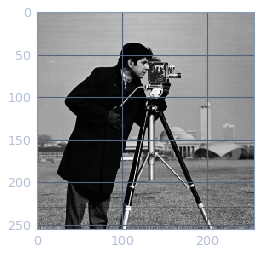

In [17]:
cameraman = mpimg.imread("images/cameraman.tif")
plt.imshow(cameraman, cmap='gray')
plt.show()

In [18]:
def edge_detector(image, sigma, threshold):    
    prewitt = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    prewitt1 = convolve2d(image, prewitt)
    prewitt2 = convolve2d(image, np.transpose(prewitt))
    grad_LoG = convolve2d(image, LoG(sigma))

    grad_prewitt = np.sqrt(np.add(np.square(prewitt1), np.square(prewitt2)))
    grad_prewitt = (grad_prewitt - grad_prewitt.min())/grad_prewitt.ptp()
    
    output = np.zeros(image.shape)
    
    for i in range(1, grad_prewitt.shape[0] - 1):
        for j in range(1, grad_prewitt.shape[1] - 1):
            if(grad_prewitt[i][j] >= threshold):
                left = grad_LoG[i - 1][j]
                right = grad_LoG[i + 1][j]
                up = grad_LoG[i][j - 1]
                down = grad_LoG[i][j + 1]

                if(grad_LoG[i][j] > 0 and ((left < 0 and right > 0) or (left > 0 and right < 0) or (down > 0 and up < 0) or (down < 0 and up > 0))):
                    output[i][j] = 1
    return output

In [19]:
edges = [0]*3
for i in range(3):
    edges[i] = edge_detector(cameraman, i + 2, 0.1)
    plt.imsave(f'output/LoG/Log_{i+2}.jpg', edges[i], cmap='gray')

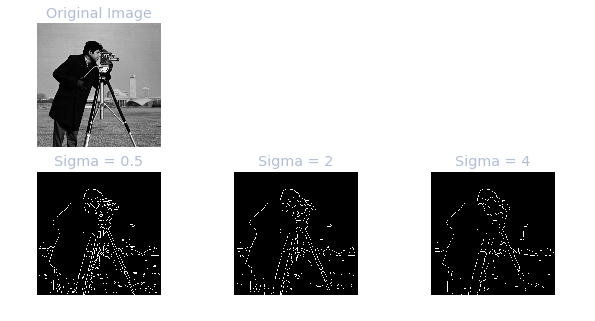

In [20]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches((10,5))
axs[0, 0].imshow(cameraman, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].axis('off')
axs[0, 0].axis('off')
axs[0, 2].axis('off')
axs[1, 0].imshow(edges[0], cmap='gray')
axs[1, 0].set_title("Sigma = 0.5")
axs[1, 0].axis('off')
axs[1, 1].imshow(edges[1], cmap='gray')
axs[1, 1].set_title("Sigma = 2")
axs[1, 1].axis('off')
axs[1, 2].imshow(edges[2], cmap='gray')
axs[1, 2].set_title("Sigma = 4")
axs[1, 2].axis('off')
plt.show()

<div style="background-color:rgba(0, 0, 0, 0.6); text-align:center; vertical-align: middle; padding:40px 0;color:rgb(255,255,255);">
    <h1>Problem 2</h1>
    <h3>Sharpening</h3>
</div>



The kernel we will be using for sharpening is an **M**<sub>3x3</sub> = $\begin{bmatrix}-1 & -1 & -1\\-1 & 8 & -1\\-1 & -1 & -1\end{bmatrix}$

In [21]:
sharpening_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpening_kernel

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

Calling **convolve** with the _sharpening_kernel_ on **cameraman** will result in the edge detection for the image.

In [22]:
sharpeness = convolve2d(cameraman, sharpening_kernel)
sharpeness[sharpeness > 255] = 255
sharpeness[sharpeness < 0] = 0

Below is the output when a factor of **<span style="color:green">0.15</span>** is applied.

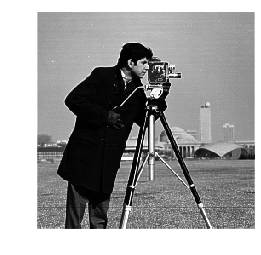

In [23]:
sharpened = np.add(np.multiply(sharpeness, 0.15), cameraman)
sharpened1 = np.where(sharpened > 255, 255, sharpened)
plt.imshow(sharpened1, cmap="gray")
plt.axis('off')
plt.show()

Below is the output when a factor of **<span style="color:green">0.25</span>** is applied.

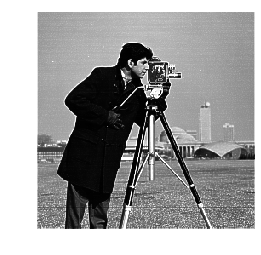

In [24]:
sharpened = np.add(np.multiply(sharpeness, 0.25), cameraman)
sharpened2 = np.where(sharpened > 255, 255, sharpened)
plt.imshow(sharpened2, cmap="gray")
plt.axis('off')
plt.show()

Below is the output when a factor of **<span style="color:green">0.35</span>** is applied.

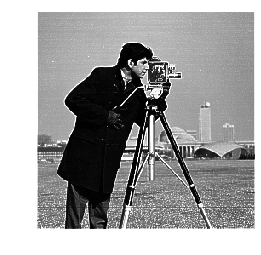

In [25]:
sharpened = np.add(np.multiply(sharpeness, 0.35), cameraman)
sharpened3 = np.where(sharpened > 255, 255, sharpened)
plt.imshow(sharpened3, cmap="gray")
plt.axis('off')
plt.show()

Summarizing the sharpening variations, here's a subplot for the three factors of sharpeness (<span style="color:green">0.15</span>, <span style="color:green">0.25</span> and <span style="color:green">0.35</span>).

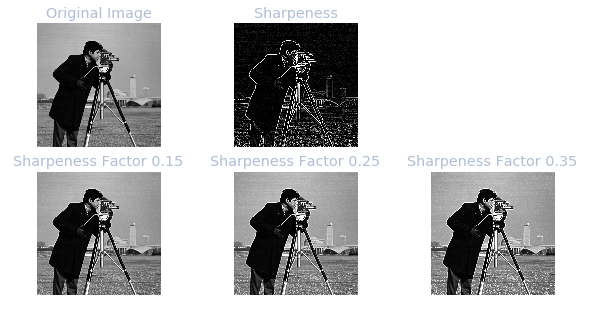

In [26]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches((10,5))
axs[0, 0].imshow(cameraman, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')
axs[0, 1].imshow(sharpeness, cmap='gray')
axs[0, 1].set_title("Sharpeness")
axs[0, 1].axis('off')
axs[0, 2].axis('off')
axs[1, 0].imshow(sharpened1, cmap='gray')
axs[1, 0].set_title("Sharpeness Factor 0.15")
axs[1, 0].axis('off')
axs[1, 1].imshow(sharpened2, cmap='gray')
axs[1, 1].set_title("Sharpeness Factor 0.25")
axs[1, 1].axis('off')
axs[1, 2].imshow(sharpened3, cmap='gray')
axs[1, 2].set_title("Sharpeness Factor 0.35")
axs[1, 2].axis('off')

plt.imsave('./output/sharpening/Sharpened.jpg', sharpened2, cmap='gray')
